<a href="https://colab.research.google.com/github/annemiekvdleest/Machine_Learning/blob/main/ML_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- look at the statistics of the data (df. describe or something)
- are the data on the same scale (normalizations)
- think about the model space H discussed in class
- browse a bit for which model would work better for the attributes of the data given
- the bias-variance tradeoff
- how can we select the appropriate features
- how best to deal with the nans. 

It's always a good idea to have a baseline like autoML then you know what scores you have to improve
https://machinelearningmastery.com/automl-libraries-for-python/


The goal of the Assignment is to predict customers engagement based on certain parameters/features.
0 class means the deals has not started, 1 means in progress and 2 means done/closed 

# Become one with the data
- look at distribution and patterns
- data imbalances and biases
- How much variation is there and what form does it take? What variation is spurious and could be preprocessed out?
- Does spatial position matter or do we want to average pool it out? How much does detail matter and how far could we afford to downsample the images? How noisy are the labels?
- search/filter/sort by whatever you can think of (e.g. type of label, size of annotations, number of annotations, etc.) and visualize their distributions and the outliers along any axis

In [3]:
#import
import pandas as pd
import numpy as np
import matplotlib as plt

In [33]:
df = pd.read_csv('train_data.csv')
print(df)
df.head(10)

           opportunity_id  current_date_day  current_date_month  \
0       15427464874523186                 2                  11   
1       15427464874523186                 9                  11   
2       53852196172413351                11                  10   
3       63848905825323247                25                   7   
4       63848905825323247                 1                   8   
...                   ...               ...                 ...   
1588  9186677120757296287                22                  11   
1589  9186677120757296287                29                  11   
1590  9186677120757296287                 6                  12   
1591  9188987770029297576                 1                   7   
1592  9207329380392407700                 4                  11   

      current_date_year  TOPICS__mean_calls_Integration__from_opp_creation  \
0                  2021                                                NaN   
1                  2021                

,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,forecast_category_at_time_of_weekstart_1_Commit,forecast_category_at_time_of_weekstart_3_Best_Case,forecast_category_at_time_of_weekstart_4_Pipeline,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
0,15427464874523186,2,11,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,23.0,23.0,0.0,4,28,2
1,15427464874523186,9,11,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,17.0,4,21,2
2,53852196172413351,11,10,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,0.0,4,11,2
3,63848905825323247,25,7,2021,NaN,NaN,0.000000,NaN,NaN,81.1167,...,True,True,False,1.0,40.0,12.0,-5.0,3,5,2
4,63848905825323247,1,8,2021,NaN,NaN,6.128259,NaN,283.769836,NaN,...,True,False,False,0.0,40.0,40.0,0.0,3,-1,2
5,68542548700621736,16,1,2021,NaN,1.60,7.257180,NaN,553.204638,182.9300,...,True,False,False,0.0,23.0,23.0,0.0,1,63,2
6,68542548700621736,23,1,2021,NaN,0.03,5.000000,0.03,582.793256,0.0300,...,True,False,False,0.0,23.0,23.0,0.0,1,6,2
7,68542548700621736,30,1,2021,NaN,0.03,0.000000,0.03,NaN,0.0300,...,True,False,False,0.0,23.0,23.0,0.0,1,6,2
8,68542548700621736,6,2,2021,NaN,0.03,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,17.0,1,2,2
9,68754075571869139,4,12,2021,NaN,NaN,0.000000,NaN,NaN,NaN,...,True,False,False,0.0,40.0,40.0,0.0,4,-1,2


### What to do with NaN + feature selection method

There are too many columns with NAN and if you delete the columns with nans then you have almost nothing left. Also should check how this affects the models performance. 

Steps:
- filling NaNs with zeros or ffill
- feature selection method



> Now, I just filled NaNs with zeros and picked the feature importance method. Now, I can move on with the next steps! But it would be good to experiment with this and see how it changes the accuracy / loss.

Ook checken of opp ID and date should be kept in feature selection method... 



[0.00196556 0.01082533 0.00406284 ... 0.00219202 0.00445727 0.01040197]


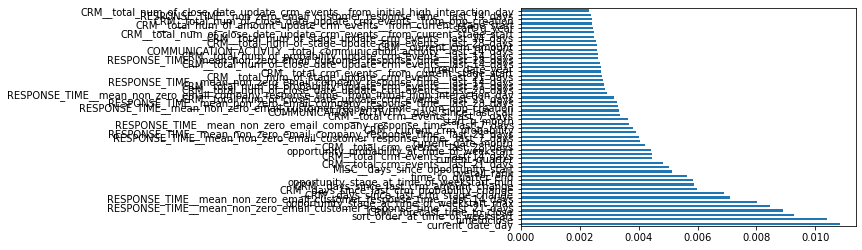

opportunity_id                                       0.001966
current_date_day                                     0.010825
current_date_month                                   0.004063
current_date_year                                    0.002717
TOPICS__mean_calls_Integration__from_opp_creation    0.000099
                                                       ...   
opportunity_stage_at_time_of_weekstart_max           0.008014
opportunity_stage_at_time_of_weekstart_min           0.005847
stage_transition                                     0.002192
current_quarter                                      0.004457
timetoclose                                          0.010402
Length: 2650, dtype: float64


In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# df.isnull().sum().to_dict()

# NaNs
df = df.fillna(0)

# df.isnull().sum().to_dict()

X = df.iloc[:,:-1]
y = df.iloc[:,len(df.columns)-1]
# print(X)
# print(y)

# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# feature importance method

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()
print(feat_importances)





In [28]:
# target values
y = df.iloc[:,len(df.columns)-1].values
print(y)

# x= data_set.iloc[:,:-1].values


[2 2 2 ... 0 0 2]


In [14]:
df.describe()

,opportunity_id,current_date_day,current_date_month,current_date_year,TOPICS__mean_calls_Integration__from_opp_creation,TOPICS__min_calls_Library__last_28_days,QUESTIONS__std_num_of_questions_in_calls_by_customer__last_7_days,TOPICS__min_calls_Collaboration__from_current_stage_start,TOPICS__std_calls_Integrations__last_7_days,TOPICS__min_calls_Evaluation_Process__from_current_stage_start,...,sort_order_at_time_of_weekstart,opportunity_probability_at_time_of_weekstart,opportunity_amount_at_time_of_weekstart,fc_transition,opportunity_stage_at_time_of_weekstart_max,opportunity_stage_at_time_of_weekstart_min,stage_transition,current_quarter,timetoclose,target
count,1.593000e+03,1593.000000,1593.000000,1593.000000,82.000000,741.000000,1593.000000,406.000000,495.000000,410.000000,...,1593.000000,1593.000000,1593.000000,1531.000000,1593.000000,1593.000000,1587.000000,1593.000000,1593.000000,1593.000000
mean,4.375875e+18,16.441933,7.168236,2020.433773,1166.524741,30.787129,1.507096,44.678101,520.202313,53.721934,...,7.887633,64.271814,31661.205500,0.182887,28.906466,26.104834,3.315060,2.686127,49.006905,1.492781
std,2.493243e+18,8.594175,3.201259,0.820307,353.240320,71.173149,3.946708,102.548239,212.808827,102.993282,...,6.810652,34.871041,51178.210159,0.513091,10.251028,10.825346,7.561203,1.054145,63.328840,0.748603
min,1.542746e+16,1.000000,1.000000,2018.000000,380.783692,0.030000,0.000000,0.030000,89.957209,0.030000,...,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,-34.000000,1.000000,-14.000000,0.000000
25%,2.454665e+18,9.000000,5.000000,2020.000000,1023.139097,0.030000,0.000000,0.030000,371.625179,0.030000,...,1.000000,30.000000,10000.000000,0.000000,21.000000,17.000000,0.000000,2.000000,9.000000,1.000000
50%,3.809525e+18,17.000000,7.000000,2021.000000,1124.465757,0.060000,0.000000,1.320000,496.952746,2.310000,...,6.000000,75.000000,15000.000000,0.000000,32.000000,27.000000,0.000000,3.000000,25.000000,2.000000
75%,6.652569e+18,24.000000,10.000000,2021.000000,1376.184766,23.605000,0.000000,29.420000,676.483240,60.130000,...,15.000000,95.000000,37800.000000,0.000000,40.000000,34.000000,8.000000,4.000000,62.000000,2.000000
max,9.207329e+18,31.000000,12.000000,2021.000000,1914.532783,609.600000,38.000000,755.082000,1178.973296,623.117000,...,18.000000,100.000000,728750.000000,2.000000,40.000000,40.000000,32.000000,4.000000,327.000000,2.000000


# Set up the end-to-end training/evaluation skeleton + get dumb baselines
- pick some simple model that you couldn’t possibly have screwed up somehow - e.g. a linear classifier, or a very tiny ConvNet
- train it, visualize the losses, any other metrics (e.g. accuracy), model predictions, and perform a series of ablation experiments with explicit hypotheses along the way
- check tips and tricks on website

http://karpathy.github.io/2019/04/25/recipe/

# Overfit + Regularize
- first get a model large enough that it can overfit (i.e. focus on training loss) and then regularize it appropriately (give up some training loss to improve the validation loss)
- check tips and tricks on website

# Tune
- random over grid search
- hyper parameter optimization

# Squeeze out the juice 
- ensembles
- leave it training